#### Lineal Regression: Chloride Statistic

### Se importan las librerias

In [1]:
# Importo las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# Libreria para separar los datos en entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria de Regresión lineal
from sklearn.linear_model import LinearRegression
# Librerias de métricas
from sklearn.metrics import mean_squared_error, r2_score

### Se cargan los datos

In [2]:
datos = pd.read_csv("data/CH_SP_DO_all.csv", sep=";")

datos

,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),sp_cond_80ft(µS/cm),sp_cond_1100ft(µS/cm),do_80ft(mg/L),do_1100ft(mg/L)
0,25/01/05,12:30,1,0.4,16.33,17.02,281,284,14.39,13.17
1,25/01/05,12:31,1,0.4,16.39,17.12,281,283,14.47,13.20
2,25/01/05,12:32,1,0.4,16.39,17.12,281,283,14.41,13.25
3,25/01/05,12:33,1,0.4,16.38,17.11,281,283,14.46,13.19
4,25/01/05,12:34,1,0.4,16.39,17.03,281,284,14.49,13.20
...,...,...,...,...,...,...,...,...,...,...
631,26/01/05,15:56,2,3.0,16.37,17.93,287,289,14.61,13.39
632,26/01/05,15:57,2,3.0,16.38,17.92,287,289,14.58,13.37
633,26/01/05,15:58,2,3.0,16.37,17.90,287,289,14.59,13.42
634,26/01/05,15:59,2,3.0,16.35,17.91,287,289,14.62,13.39


In [3]:
# Se observan las estadísticas
datos.describe()

,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),sp_cond_80ft(µS/cm),sp_cond_1100ft(µS/cm),do_80ft(mg/L),do_1100ft(mg/L)
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.00000,636.000000
mean,1.500000,1.633333,16.381462,17.318978,283.657233,286.014151,14.55261,13.347752
std,0.500394,1.066463,0.285382,0.510498,2.617710,2.223310,0.14500,0.133262
min,1.000000,0.400000,15.620000,16.550000,281.000000,283.000000,14.13000,12.980000
25%,1.000000,0.400000,16.290000,16.880000,281.000000,284.000000,14.52750,13.277500
50%,1.500000,1.500000,16.390000,17.100000,283.500000,285.500000,14.61000,13.400000
75%,2.000000,3.000000,16.470000,17.880000,286.000000,288.000000,14.64000,13.450000
max,2.000000,3.000000,17.120000,18.350000,287.000000,289.000000,14.74000,13.530000


In [4]:
dia1 = datos[datos['day'] == 1]
dia2 = datos[datos['day'] == 2]

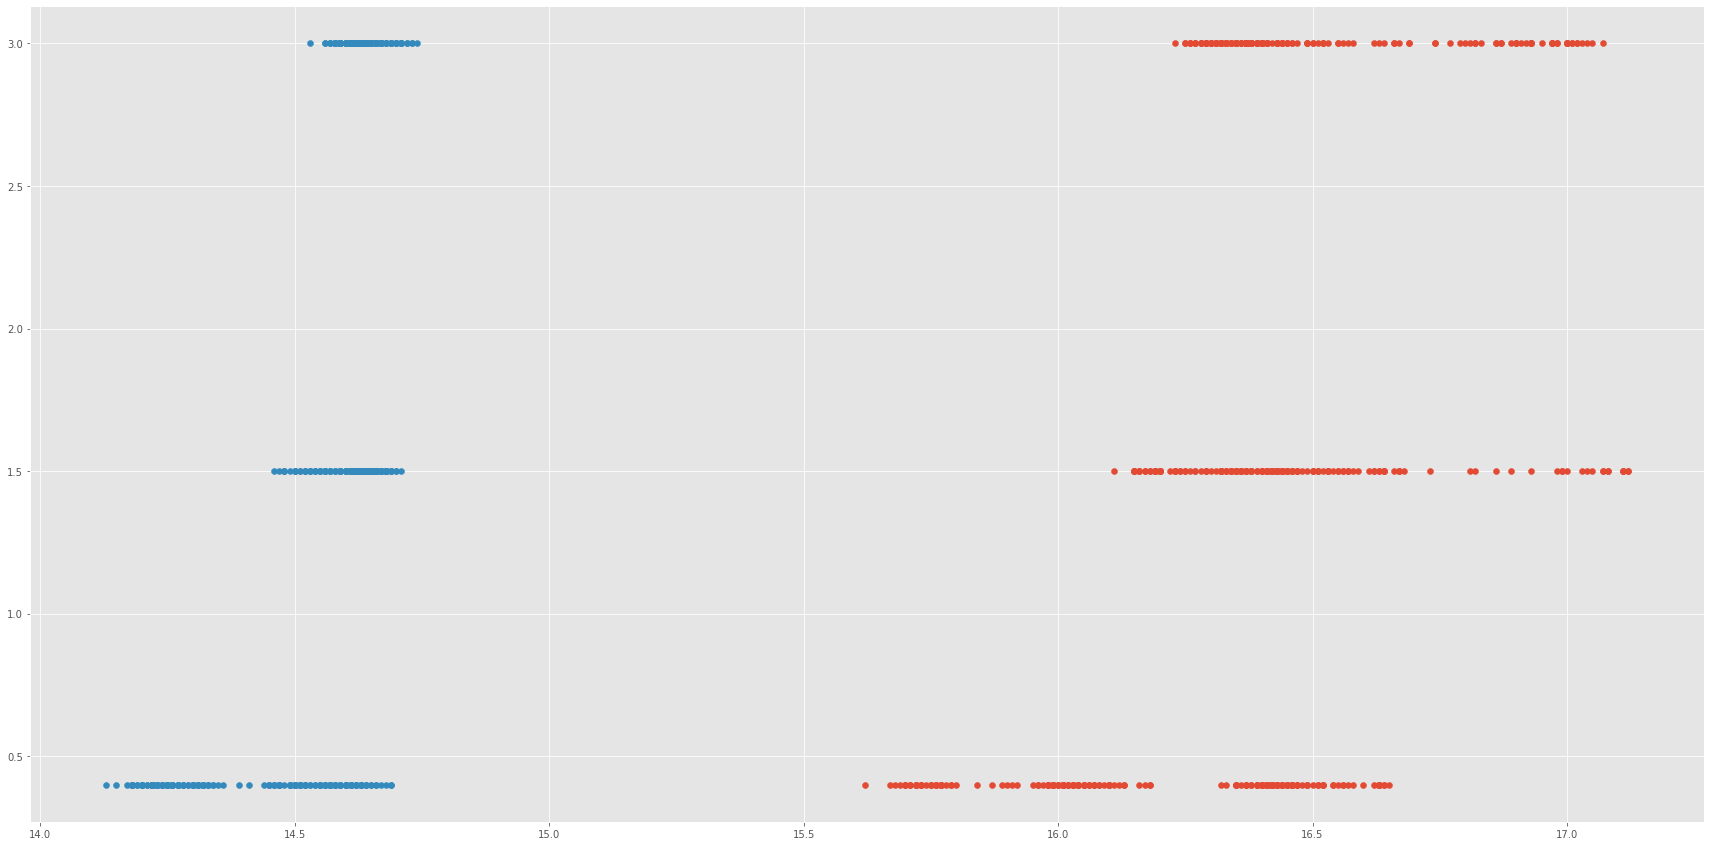

In [12]:
# Defino el tamaño de la gráfica
plt.rcParams['figure.figsize'] = (30,15)

# Traigo los valores del dia 1
x1 = datos['chloride_80ft(mg/L)'].values
#x2 = datos['sp_cond_80ft(µS/cm)'].values
x3 = datos['do_80ft(mg/L)'].values
# Traigo los valores de # Shares
y = datos['concentration'].values

# Genero la gráfica
plt.scatter(x1, y)
#plt.scatter(x2, y)
plt.scatter(x3, y)
plt.show()

#### Regresión Lineal Chloride 80ft (mg/L) - Día 1

In [8]:
# Asigno la variable de entrada X para entrenamiento y las etiquetas Y
features = ['chloride_80ft(mg/L)','sp_cond_80ft(µS/cm)','do_80ft(mg/L)',
            'chloride_1100ft(mg/L)','sp_cond_1100ft(µS/cm)','do_1100ft(mg/L)']
X = dia2[features].values
y = dia2[['concentration']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#### Modelo de predicción

In [9]:
# Se crea un objeto de regresión lineal
LR = LinearRegression()

# Se entrena el modelo
LR.fit(X_train, y_train)

# Se hace las predicciones (linea en 2D)
pred = LR.predict(X_train)

# Se obtienen los coeficiones, según la Tangente
print('Coeficiente:', LR.coef_)
# Valor de la intercepción (valor donde corta el eje Y en X=0)
print('Intercepción:', LR.intercept_)
# Error cuadrático medio
print('Error Cuadrático Medio: %.2f' % mean_squared_error(y_train, pred))
# Puntaje de varianza, el mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, pred))

Coeficiente: [[ 0.42883149  0.07600386  1.03740194 -0.5926247   0.55907     4.02897517]]
Intercepción: [-246.31449352]
Error Cuadrático Medio: 0.21
R2: 0.82
